# Изучение закономерностей, определяющих успешность игр

## 1. Обзор данных

Изучим исходный датафрейм. Посмотрим информацию и выведем на экран.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try: 
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('Downloads/games.csv')
    

In [2]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Получим информацию о датафрейме

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 1.1 Вывод
При первичном обзоре файлов были обнаружены проблемы:
1. Названия столбцов не приведены к нижнему регистру;
2. Тип данных в столбце User_Score - object;
3. В столбцах Critic_Score, User_Score и Rating большое количество пропусков;
4. Столбец Year_of_Release имеет тип данных float.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез.

## 2. Подготовка данных

Приведем столбцы к нужному регистру

In [5]:
df.columns = df.columns.str.lower()

In [52]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Для того, чтобы не искажать данные, мы не будем заполнять пропуски в таблице.

Преобразуем данные в нужные типы

tbd - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Для нашего исследования tbd равносильно пропускам. Для того, чтобы в дальнешем со столбцом 'user_score' проводить различные операции, было решено заменить tbd на NaN.

In [39]:
df['year_of_release'] = df['year_of_release'].astype('Int32')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [12]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 

In [53]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Пропуски в столбцах critic_score, user_score и rating мы заполнять не будем чтобы не искажать результаты.

## 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы, для этого создадим сводную таблицу.

In [14]:
df_years = df.pivot_table(index = ['year_of_release'], values = 'platform', aggfunc = 'count')

In [15]:
df_years

,platform
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Для более удобного восприятия построим график по полученным значениям.

<AxesSubplot:xlabel='year_of_release'>

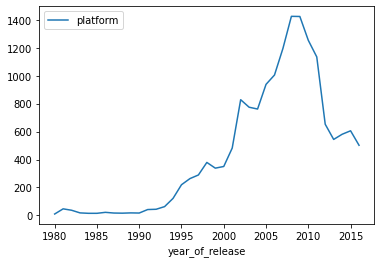

In [41]:
df_years.plot()

Больше всего игр выпускалось в период с 2005 по 2011 год

Определим платформы с наибольшими суммарными продажами.

In [16]:
df_platforms = df.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum').sort_values('total_sales')

In [17]:
df_platforms

,total_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,30.77


Самыми популярными оказались платформы PS2, X360, PS3, Wii.

Построим распределение по годам и определим, за какой характерный срок появляются новые и исчезают старые платформы.

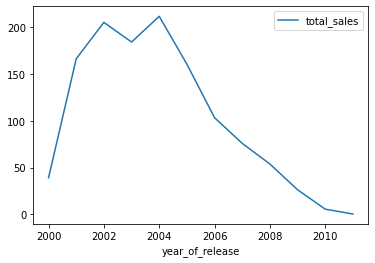

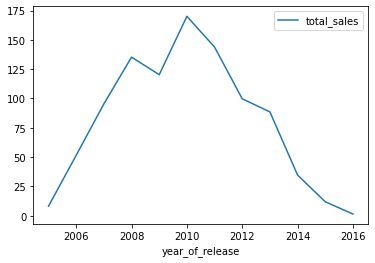

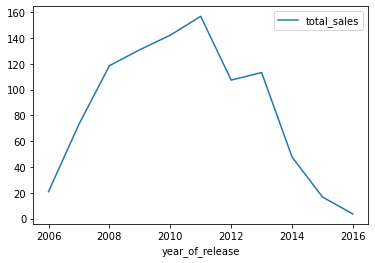

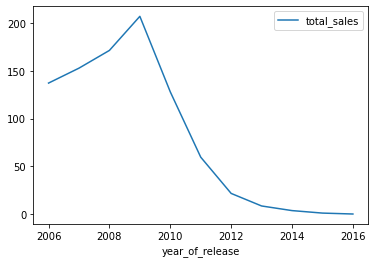

In [18]:
df_ps2 = df.query('platform == "PS2"').pivot_table(index = ['year_of_release'], values = 'total_sales', aggfunc = 'sum').plot()
df_x360 = df.query('platform == "X360"').pivot_table(index = ['year_of_release'], values = 'total_sales', aggfunc = 'sum').plot()
df_ps3 = df.query('platform == "PS3"').pivot_table(index = ['year_of_release'], values = 'total_sales', aggfunc = 'sum').plot()
df_wii = df.query('platform == "Wii"').pivot_table(index = ['year_of_release'], values = 'total_sales', aggfunc = 'sum').plot()

По приведенным графикам можно сделать вывод, что 'срок жизни' платформы - 10 лет.

Для нашего исследования мы возьмём за актуальный период 2013-2016 годы.

In [20]:
df_four_years = df[df['year_of_release'] >= 2013] 

In [56]:
df_four_years.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Выберем несколько потенциально прибыльных платформ за актуальный период.

In [59]:
df_four_years_pivot = df_four_years.pivot_table(index = ['platform'], values = 'total_sales', aggfunc = 'sum').sort_values('total_sales')
df_four_years_pivot

,total_sales
platform,
DS,1.54
PSP,3.50
Wii,13.66
PSV,32.99
PC,39.43
WiiU,64.63
X360,136.80
3DS,143.25
XOne,159.32


Возьмём 3 платформы, которые находятся на стадии развития за выбранный нами актуальный период: 3DS, XOne, PS4

In [60]:
df_ps4 = df_four_years.query('platform == "PS4"')
df_xone = df_four_years.query('platform == "XOne"')
df_3ds = df_four_years.query('platform == "3DS"')

df_ps4_pivot = df_ps4.pivot_table(index = ['year_of_release'], values = 'total_sales', aggfunc = 'sum')
df_xone_pivot = df_xone.pivot_table(index = ['year_of_release'], values = 'total_sales', aggfunc = 'sum')
df_3ds_pivot = df_3ds.pivot_table(index = ['year_of_release'], values = 'total_sales', aggfunc = 'sum')

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0.5, 1.0, 'Глобальные продажи на PS4')

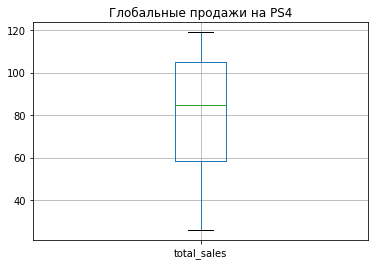

In [60]:
df_ps4_pivot.boxplot()
plt.title('Глобальные продажи на PS4')

Text(0.5, 1.0, 'Глобальные продажи на XOne')

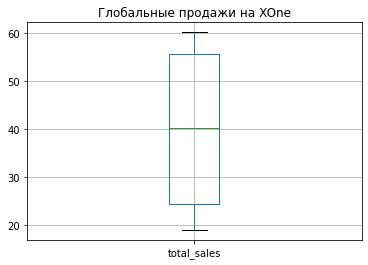

In [58]:
df_xone_pivot.boxplot()
plt.title('Глобальные продажи на XOne')

Text(0.5, 1.0, 'Глобальные продажи на 3ds')

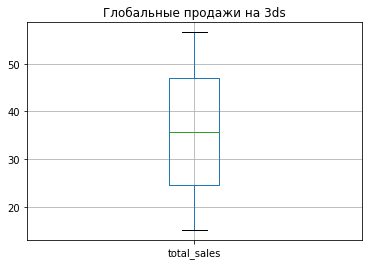

In [59]:
df_3ds_pivot.boxplot()
plt.title('Глобальные продажи на 3ds')

По приведенным графикам можно сделать следующие выводы:

* Медианное значение для PS4 = 85 млн. копий
* Медианное значение для XOne = 40 млн. копий
* Медианное значение для 3ds = 36 млн. копий

Самая прибыльная платформа - PS4

Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

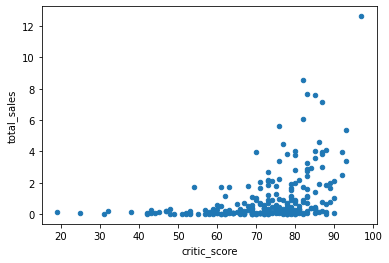

In [61]:
df_ps4.plot(x='critic_score', y='total_sales', kind='scatter')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

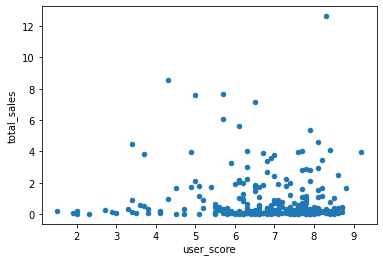

In [66]:
df_ps4.plot(x='user_score', y='total_sales', kind='scatter')

In [67]:
display(df_ps4['total_sales'].corr(df_ps4['critic_score']))
display(df_ps4['total_sales'].corr(df_ps4['user_score']))

0.40656790206178123

-0.03195711020455643

По приведенным данным, мы можем сделать вывод, что корреляция наблюдается только между общими продажами и оценкой критиков (40 процентов). Оценка пользователей не влияет на продажи. Рассмотрим другие платформы.

Посмотрим, как влияют на продажи внутри платформы XOne отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

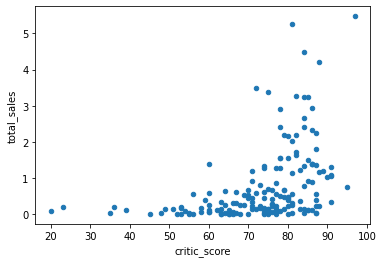

In [62]:
df_xone.plot(x='critic_score', y='total_sales', kind='scatter')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

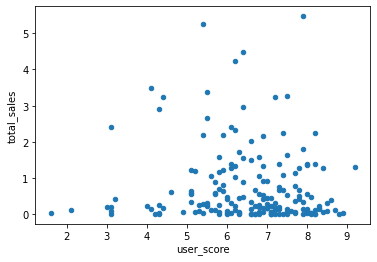

In [64]:
df_xone.plot(x='user_score', y='total_sales', kind='scatter')

In [66]:
display(df_xone['total_sales'].corr(df_xone['critic_score']))
display(df_xone['total_sales'].corr(df_xone['user_score']))

0.41699832800840164

-0.06892505328279415

Результаты получились аналогичными PS4.

Посмотрим, как влияют на продажи внутри платформы 3ds отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

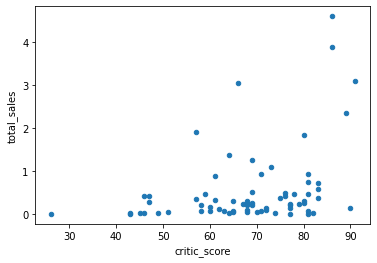

In [67]:
df_3ds.plot(x='critic_score', y='total_sales', kind='scatter')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

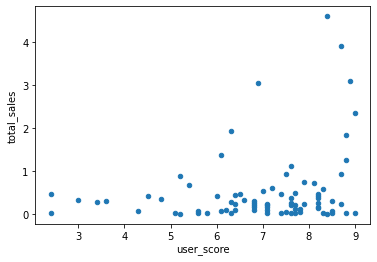

In [72]:
df_3ds.plot(x='user_score', y='total_sales', kind='scatter')

In [70]:
display(df_3ds['total_sales'].corr(df_3ds['critic_score']))
display(df_3ds['total_sales'].corr(df_3ds['user_score']))

0.35705661422881035

0.24150411773563016

Внутри платформы 3ds мы наблюдаем немного иную картину. Отзывы критиков всё также влияют на продажи (корреляция 36%), но внутри данной платформы имеют влияние и отзывы пользователей (корреляция 24 процента).

Для уточнения результатов, найдем корреляцию еще у двух популярных платформ: PS3 и X360

In [86]:
df_ps3 = df_four_years.query('platform == "PS3"')
df_x360 = df_four_years.query('platform == "X360"')

In [87]:
display(df_ps3['total_sales'].corr(df_ps3['critic_score']))
display(df_ps3['total_sales'].corr(df_ps3['user_score']))

0.3342853393371919

0.0023944027357566907

In [88]:
display(df_x360['total_sales'].corr(df_x360['critic_score']))
display(df_x360['total_sales'].corr(df_x360['user_score']))

0.3503445460228664

-0.011742185147181342

Таким образом, мы можем сделать вывод о том, что внутри большинства платформ только отзывы критиков влияют на продажи, отзывы же пользователей совсем не оказывают влияние на продажи игр. Внутри же платформы 3ds и отзывы критиков и отзывы пользователей влияют на продажи.

Определим самые прибыльные жанры

In [91]:
df_four_years_pivot_genre = df_four_years.pivot_table(index = ['genre'], values = 'total_sales', aggfunc = 'median').sort_values('total_sales')
df_four_years_pivot_genre

,total_sales
genre,
Adventure,0.030
Puzzle,0.060
Strategy,0.080
Misc,0.100
Simulation,0.100
Action,0.110
Racing,0.120
Fighting,0.125
Role-Playing,0.125


* Самые прибыльные жанры - Shooter, Sports, Platform
* Самые не прибыльные жанры - Adventure, Puzzle, Strategy

## 4. Определение портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5). 
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [70]:
df_four_years.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


При помощи сводных таблиц определим самые популярные платформы в Северной Америке, Европе и Японии.

In [94]:
df_four_years_pivot_na = df_four_years.pivot_table(index = ['platform'], values = 'na_sales', aggfunc = 'sum').sort_values('na_sales')
df_four_years_pivot_eu = df_four_years.pivot_table(index = ['platform'], values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales')
df_four_years_pivot_jp = df_four_years.pivot_table(index = ['platform'], values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales')

display(df_four_years_pivot_na)
display(df_four_years_pivot_eu)
display(df_four_years_pivot_jp)

,na_sales
platform,
PSP,0.00
DS,0.57
PSV,5.04
Wii,6.56
PC,11.11
WiiU,29.21
3DS,38.20
PS3,63.50
X360,81.66


,eu_sales
platform,
PSP,0.17
DS,0.85
Wii,5.93
PSV,6.10
WiiU,19.85
PC,25.36
3DS,30.96
X360,42.52
XOne,51.59


,jp_sales
platform,
DS,0.00
PC,0.00
Wii,0.05
XOne,0.34
X360,0.51
PSP,3.29
WiiU,10.88
PS4,15.96
PSV,18.59


Топ-5 самых популярных платформ в Северной Америке:
1. PS4
2. XOne
3. X360
4. PS3
5. 3DS

Топ-5 самых популярных платформ в Европе:
1. PS4
2. PS3
3. XOne
4. X360
5. 3DS

Топ-5 самых популярных платформ в Японии:
1. 3DS
2. PS3
3. PSV
4. PS4
5. WiiU

Построим круговые диаграммы для распределения продаж по каждому региону

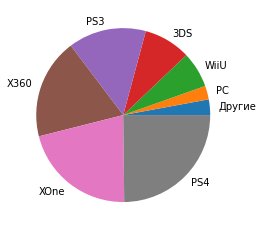

In [116]:
platforms_na = ['Другие', 'PC', 'WiiU', '3DS', 'PS3', 'X360', 'XOne', 'PS4']
data_na = [12.7, 11.11, 29.21, 38.20, 63.50, 81.66, 93.12, 108.74]

plt.pie(data_na, labels=platforms_na)
plt.show()

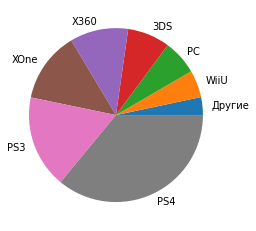

In [117]:
platforms_eu = ['Другие', 'WiiU', 'PC', '3DS', 'X360', 'XOne', 'PS3', 'PS4']
data_eu = [13.05, 19.85, 25.36, 30.96, 42.52, 51.59, 67.81, 141.09]

plt.pie(data_eu, labels=platforms_eu)
plt.show()

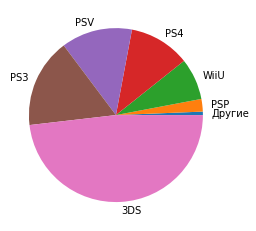

In [119]:
platforms_jp = ['Другие', 'PSP', 'WiiU', 'PS4', 'PSV', 'PS3', '3DS']
data_jp = [0.9, 3.29, 10.88, 15.96, 18.59, 23.35, 67.81]

plt.pie(data_jp, labels=platforms_jp)
plt.show()

Определим различия в долях продаж, для этого найдем суммарные продажи в каждом регионе за актуальный период.

In [71]:
display(df_four_years_pivot_na['na_sales'].sum())
display(df_four_years_pivot_eu['eu_sales'].sum())
display(df_four_years_pivot_jp['jp_sales'].sum())

437.71000000000004

392.23

140.78

Найдем доли продаж каждого региона относительно друг друга.

In [81]:
sum_sales = (df_four_years_pivot_na['na_sales'].sum() + df_four_years_pivot_eu['eu_sales'].sum() + df_four_years_pivot_jp['jp_sales'].sum()) 
na = df_four_years_pivot_na['na_sales'].sum()*100 / sum_sales
eu = df_four_years_pivot_eu['eu_sales'].sum()*100  / sum_sales
jp = df_four_years_pivot_jp['jp_sales'].sum()*100  / sum_sales

print(f'Доля продаж в Северной Америке: {na:.0f}%')
print(f'Доля продаж в Европе: {eu:.0f}%')
print(f'Доля продаж в Японии: {jp:.0f}%')

Доля продаж в Северной Америке: 45%
Доля продаж в Европе: 40%
Доля продаж в Японии: 15%


Определим самые популярные жанры в каждом регионе за актуальный период

In [39]:
df_four_years_pivot_genre_na = df_four_years.pivot_table(index = ['genre'], values = 'na_sales', aggfunc = 'sum').sort_values('na_sales')
df_four_years_pivot_genre_eu = df_four_years.pivot_table(index = ['genre'], values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales')
df_four_years_pivot_genre_jp = df_four_years.pivot_table(index = ['genre'], values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales')

display(df_four_years_pivot_genre_na)
display(df_four_years_pivot_genre_eu)
display(df_four_years_pivot_genre_jp)

,na_sales
genre,
Puzzle,0.83
Strategy,3.28
Simulation,4.86
Adventure,7.14
Racing,12.96
Fighting,15.55
Platform,18.14
Misc,27.49
Role-Playing,46.40


,eu_sales
genre,
Puzzle,1.00
Strategy,4.22
Adventure,8.25
Fighting,8.55
Simulation,10.92
Platform,15.58
Misc,20.04
Racing,20.19
Role-Playing,36.97


,jp_sales
genre,
Puzzle,1.18
Strategy,1.77
Racing,2.30
Simulation,4.52
Platform,4.79
Sports,5.41
Adventure,5.82
Shooter,6.61
Fighting,7.65


Топ-5 самых популярных жанров в Северной Америке:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Топ-5 самых популярных жанров в Европе:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

Топ-5 самых популярных жанров в Японии:
1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Shooter

Вывод: самые популярные жанры в Северной Америке и Европе практически идентичны. В четверку вошли Action, Shooter, Sports, Role-Playing. Пятое же место в Северной Америке занимает Misc, а в Европе - Racing.
В Японии же самым популярным жанром оказался Role-Playing, следом идёт Action. Второй по популярности в Северной Амрике и Европе жанр - Shooter в Японии занял 5 место.

Определим, влияет ли рейтинг ESRB на продажи в каждом отдельном регионе?

In [41]:
df_four_years_pivot_rating_na = df_four_years.pivot_table(index = ['rating'], values = 'na_sales', aggfunc = 'sum').sort_values('na_sales')
df_four_years_pivot_rating_eu = df_four_years.pivot_table(index = ['rating'], values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales')
df_four_years_pivot_rating_jp = df_four_years.pivot_table(index = ['rating'], values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales')

display(df_four_years_pivot_rating_na)
display(df_four_years_pivot_rating_eu)
display(df_four_years_pivot_rating_jp)

,na_sales
rating,
T,49.79
E10+,54.24
E,79.05
M,165.21


,eu_sales
rating,
T,41.95
E10+,42.69
E,83.36
M,145.32


,jp_sales
rating,
E10+,5.89
M,14.11
E,15.14
T,20.59


Вывод: рейтинг ESRB влияет на продажи в каждом регионе. В Северной Америке и в Европе чуть меньше половины от всех продаж приходится на игры с рейтингом M - для взрослых. В Японии же самые популярные игры с рейтингом T - для подростков.

## 5 Проверка гипотез

Для проверки гипотез был выбран t-тест. Мы используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Наши выборки независимы и он не требует нормального распределения выборок, если количество наблюдений достаточно велико.

**Проверим первую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

* Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

Создадим срезы с играми на платформах Xbox One и PC.

In [88]:
df_four_years_xone = df_four_years.query('platform == "XOne"')
df_four_years_pc = df_four_years.query('platform == "PC"')

Удалим пропуски в столбцах 'user_score'

In [43]:
df_four_years_xone = df_four_years_xone.dropna(axis='index', how='any', subset=['user_score'])
df_four_years_pc = df_four_years_pc.dropna(axis='index', how='any', subset=['user_score'])

Проверим первую гипотезу при помощи t-теста

In [44]:
from scipy import stats as st

sample_1 = df_four_years_xone['user_score']
sample_2 = df_four_years_pc['user_score']

alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу (вероятность 14 проценов, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые)

**Проверим вторую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные**

* Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports разные
* Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Создадим срезы с играми в жанрах Action и Sports

In [46]:
df_four_years_action = df_four_years.query('genre == "Action"')
df_four_years_sports = df_four_years.query('genre == "Sports"')

Удалим пропуски в столбцах 'user_score'

In [47]:
df_four_years_action = df_four_years_action.dropna(axis='index', how='any', subset=['user_score'])
df_four_years_sports = df_four_years_sports.dropna(axis='index', how='any', subset=['user_score'])

Проверим вторую гипотезу при помощи t-теста

In [89]:
from scipy import stats as st

sample_1 = df_four_years_action['user_score']
sample_2 = df_four_years_sports['user_score']

alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


С уверенностью отвергаем нулевую гипотезу и делаем вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

**1. Мы провели исследовательский анализ данных и сделали следующие выводы:**

* Средний период "жизни" платформы - 10 лет;
* Нами был выбран актуальный период 4 года (2013-2016)
* За актуальный период самими актуальными платформами оказались 3DS, XOne, PS4;
* В результате исследования оказалось, что на продажи игр внутри большинства платформ влияют только отзывы критиков, отзывы же пользователей не влияют совсем. Внутри платформы 3ds влияют как отзывы критиков, так и отзывы пользователей. Возможно, это связано с тем, что данная платформа является самой популярной в Японии.
* Самыми прибыльными жанрами игр оказались Shooter, Sports, Platform.

**2. Мы составили портрет пользователя каждого региона:**

Топ-5 самых популярных платформ в Северной Америке:
1. PS4
2. XOne
3. X360
4. PS3
5. 3DS

Топ-5 самых популярных платформ в Европе:
1. PS4
2. PS3
3. XOne
4. X360
5. 3DS

Топ-5 самых популярных платформ в Японии:
1. 3DS
2. PS3
3. PSV
4. PS4
5. WiiU

Топ-5 самых популярных жанров в Северной Америке:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Топ-5 самых популярных жанров в Европе:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

Топ-5 самых популярных жанров в Японии:
1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Shooter

* Рейтинг ESRB влияет на продажи в каждом регионе. В Северной Америке и в Европе чуть меньше половины от всех продаж приходится на игры с рейтингом M - для взрослых. В Японии же самые популярные игры с рейтингом T - для подростков.

**3. Мы проверили обе гипотезы при помощи t-теста:**
* Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась лишь отчасти (pvalue = 14 процентов);
* Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные подвердилась полностью.

**4. Общие рекомендации:**
* Для Северной Америки и Европы акцент в рекламе делать на игры для взрослых и такие жанры, как Action, Shooter, Sports.
* Для Японии акцент в рекламе делать на игры для подростков и такие жанры, как Role-Playing, Action, Misc.
* В Северной Америке и Европе делать упор на игры на платформе PS4, а в Японии - 3DS.
* В рекламе лучше опираться на отзывы критиков, нежели отзывы пользователей.